# Plot Raster Map

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from gdalconst import * 
from numpy import linspace
from numpy import meshgrid
import numpy as np

In [16]:
filename = "./images/Bhuvan/cdnd43x.tif"

ds = gdal.Open(filename, GA_ReadOnly)
data = ds.ReadAsArray()
data = np.flipud(data) # since the plotting happens row-wise from bottom to top, the array needs to be flipped 

gt = ds.GetGeoTransform()   
proj = ds.GetProjection()


In [28]:
gt, proj

((76.99986111111112,
  0.0002777777777777778,
  0.0,
  13.00013888888889,
  0.0,
  -0.0002777777777777778),
 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]')

In [17]:
xres = gt[1]
yres = gt[5]

xmin = gt[0] + xres * 0.5
xmax = gt[0] + (xres * ds.RasterXSize) - xres * 0.5
ymin = gt[3] + (yres * ds.RasterYSize) + yres * 0.5
ymax = gt[3] - yres * 0.5

x_center=(xmin+xmax)/2
y_center=(ymin+ymax)/2 

In [29]:
x_center, y_center

(0.0002777777777777778, 77.49986111111112, 12.50013888888889)

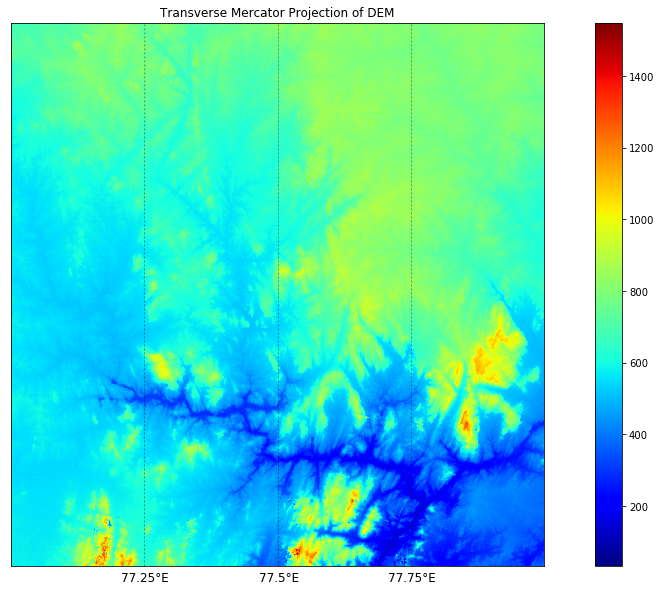

In [51]:
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, axisbg='w', frame_on=True)

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'i' means use intermediate resolution coastlines.
# lon_0, lat_0 are the central longitude and latitude of the projection.

m = Basemap(llcrnrlon=xmin,llcrnrlat=ymin,urcrnrlon=xmax,urcrnrlat=ymax,
             resolution='i', projection='tmerc', lat_0 = y_center, lon_0 = x_center)

parallels = np.arange(15.,30.,0.25)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=12, linewidth=0.4) 

meridians = np.arange(70.,90.,0.25)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12, linewidth=0.4)

x = linspace(0, m.urcrnrx, data.shape[1])
y = linspace(0, m.urcrnry, data.shape[0])

xx, yy = meshgrid(x, y)

#m.pcolormesh(xx, yy, data, cmap=plt.cm.gist_earth)

m.pcolormesh(xx, yy, data, cmap=plt.cm.jet)

#plt.contourf(xx, yy, data, levels=np.linspace(np.amin(data[data > 0]),np.amax(data), 50), cmap=plt.cm.jet)

plt.title("Transverse Mercator Projection of DEM")

cbar = plt.colorbar()

plt.show()

In [52]:
##plt.savefig('Path\\To\\Save_Image.png', bbox_inches='tight', pad_inches=.2, dpi=600) 